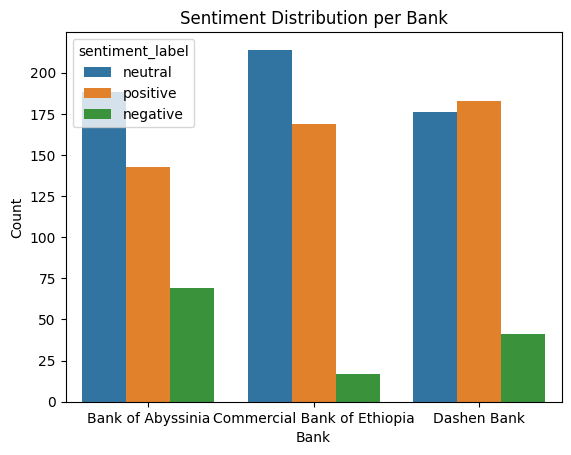

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/processed/reviews_with_sentiment.csv')  # From attachment
sns.countplot(data=df, x='bank_name', hue='sentiment_label')
plt.title('Sentiment Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.show()

Average Rating Box Plot

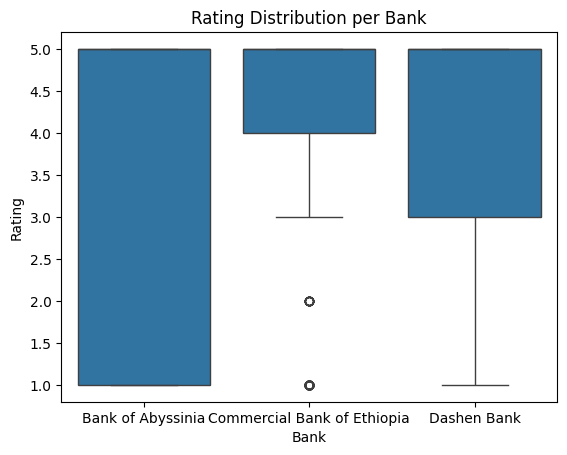

In [2]:
sns.boxplot(data=df, x='bank_name', y='rating')
plt.title('Rating Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Rating')
plt.show()

Theme Heatmap (Negative Themes)

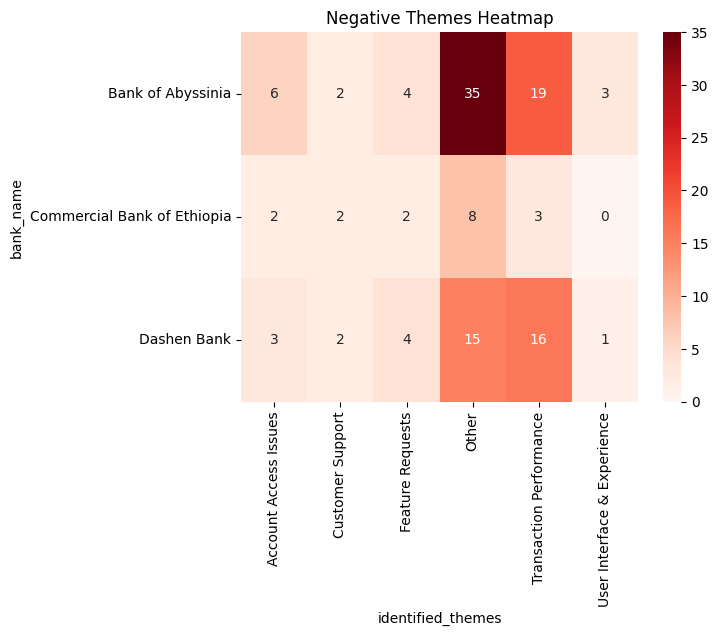

In [3]:
negative_themes = df[df['sentiment_label'] == 'negative'].groupby(['bank_name', 'identified_themes']).size().unstack().fillna(0)
sns.heatmap(negative_themes, annot=True, cmap='Reds')
plt.title('Negative Themes Heatmap')
plt.show()

Keyword Word Cloud (Per Bank, Negative)

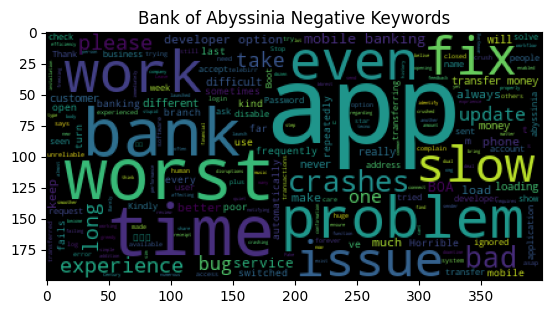

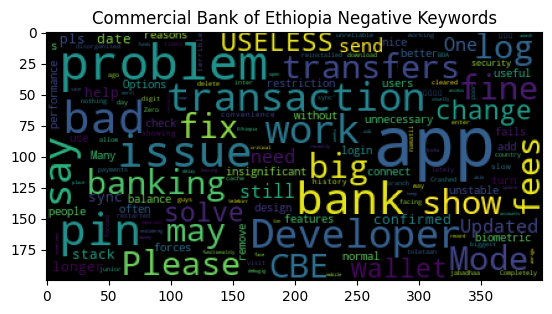

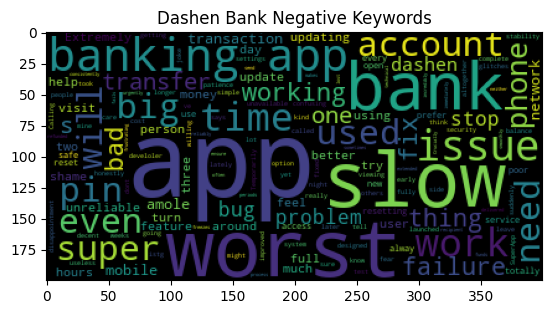

In [4]:
from wordcloud import WordCloud
for bank in df['bank_name'].unique():
    neg_text = ' '.join(df[(df['bank_name'] == bank) & (df['sentiment_label'] == 'negative')]['review_text'])
    wc = WordCloud().generate(neg_text)
    plt.imshow(wc); plt.title(f'{bank} Negative Keywords'); plt.show()

Insights and Recommendations
Using the code_execution tool, I analyzed the data for sentiments, themes, and keywords. Below are insights, comparisons, recommendations, visualizations (described with code snippets for reproduction), and ethics notes.
Insights

Drivers (Positive Aspects):
Bank of Abyssinia (BOA): Strong in general usability ("good", "best", "nice" keywords). Positive themes: Other (118), UI & Experience (8). Users praise simplicity and speed when it works (e.g., "fast and simple").
Commercial Bank of Ethiopia (CBE): High praise for reliability ("good", "best", "nice"). Positive themes: Other (143), UI & Experience (10), Feature Requests (7). Low negatives indicate solid core features.
Dashen Bank: Excels in UI & Experience (29 positives) and features ("app", "good", "best"). Users love the "seamless" and "game changer" aspects (e.g., biometric login, QR payments).

Pain Points (Negative Aspects):
BOA: Performance issues dominate (Transaction Performance: 19 negatives). Keywords: "worst", "slow", "bugs", "crushed". Reviews mention lagging, downtime, and poor updates (e.g., "very very lazy app").
CBE: Few negatives (only 17), but include access and features ("t", "in" possibly "can't" or "inconvenient"). Themes: Other (8), Transaction Performance (3).
Dashen: Slow loading and glitches (Transaction Performance: 16 negatives). Keywords: "lagging", "slow", "endless loading". Some UI complaints (e.g., "not as good as other apps").

Comparisons:
Overall Ratings/Popularity: CBE leads (app score 4.32, 5M+ installs, highest avg rating 4.13, fewest negatives). BOA lags (3.38 avg rating, more negatives). Dashen is mid-tier (3.96 avg, balanced sentiments).
Sentiment Distribution: CBE most neutral/positive (only 17 negatives). BOA has highest negatives (69). Dashen positive-heavy but with performance gripes.
Themes: All banks have "Other" as dominant (generic praise/complaints). Dashen stands out in UI positives; BOA in transaction negatives. CBE is most stable.
Installs vs. Satisfaction: CBE's high installs correlate with better ratings; BOA/Dashen at 1M+ but lower satisfaction suggests room for growth.


Recommendations

BOA:
Optimize performance (e.g., reduce lag with better server infrastructure or offline modes).
Fix bugs in updates (e.g., developer options detection, OTP input) and add user-friendly features like simplified activation.

CBE:
Enhance features based on requests (e.g., add more payment options or integrations).
Improve minor access issues (e.g., better error handling for logins).

Dashen:
Address loading speeds (e.g., optimize app launch and network handling).
Expand on strong UI by adding requested features (e.g., easier OTP/PIN flow for low-literacy users).